In [1]:
#! pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\hrush\AppData\Local\Temp\pip-install-ut4980gf\tensorflow-gpu_dbac885aafb94a88827a7366d236ffb5\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-e

In [2]:
#! pip install opencv-python

### import libs

In [1]:
import tensorflow as tf
import os

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

### Remove dodgy images

In [3]:
import cv2
import imghdr

In [4]:
#directory path
data_dir = 'data'

In [5]:
#image extensions
image_exts = ['jpeg','jpg','bmp','png']

In [6]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            #os.remove(image_path)

### LOAD Data

In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [28]:
#builds image dataset which preprocess the data and also resize if required, datapipeline
data = tf.keras.utils.image_dataset_from_directory('data')

Found 162 files belonging to 2 classes.


In [29]:
# datapipeline iterator
data_iterator = data.as_numpy_iterator()

In [30]:
# grabs all data in numpy array 
# it has 'len = 2' -> it contains images, labels 
batch = data_iterator.next()
batch

(array([[[[190.02051 , 111.91992 , 104.609375],
          [211.96777 , 130.83691 , 126.578125],
          [198.12402 , 157.85156 , 152.1416  ],
          ...,
          [215.61816 , 224.84375 , 229.10254 ],
          [214.83594 , 225.83594 , 229.83594 ],
          [216.12988 , 226.71094 , 230.96875 ]],
 
         [[180.33789 ,  97.956055,  89.384766],
          [210.68164 , 112.71777 , 113.58789 ],
          [202.9502  , 151.97656 , 146.27637 ],
          ...,
          [202.5498  , 211.00293 , 213.77637 ],
          [202.5498  , 211.67969 , 213.77637 ],
          [203.16309 , 211.90625 , 214.38965 ]],
 
         [[170.20215 ,  97.2334  ,  85.88867 ],
          [207.2832  , 112.2832  , 112.53613 ],
          [208.4834  , 143.20508 , 137.20508 ],
          ...,
          [202.91113 , 207.91113 , 210.91113 ],
          [202.28906 , 207.28906 , 210.28906 ],
          [202.625   , 207.625   , 210.625   ]],
 
         ...,
 
         [[ 85.072266,  73.822266,  75.447266],
          [ 85.133

In [16]:
#images represented as numpy arrays
batch[0]
batch[0].shape

(32, 256, 256, 3)

In [13]:
#labels represented as numpy arrays
# everytime you run the iterator, new batch of data from datapipeline
batch[1]
# 1 = sad people
# 0 = happy people


array([1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

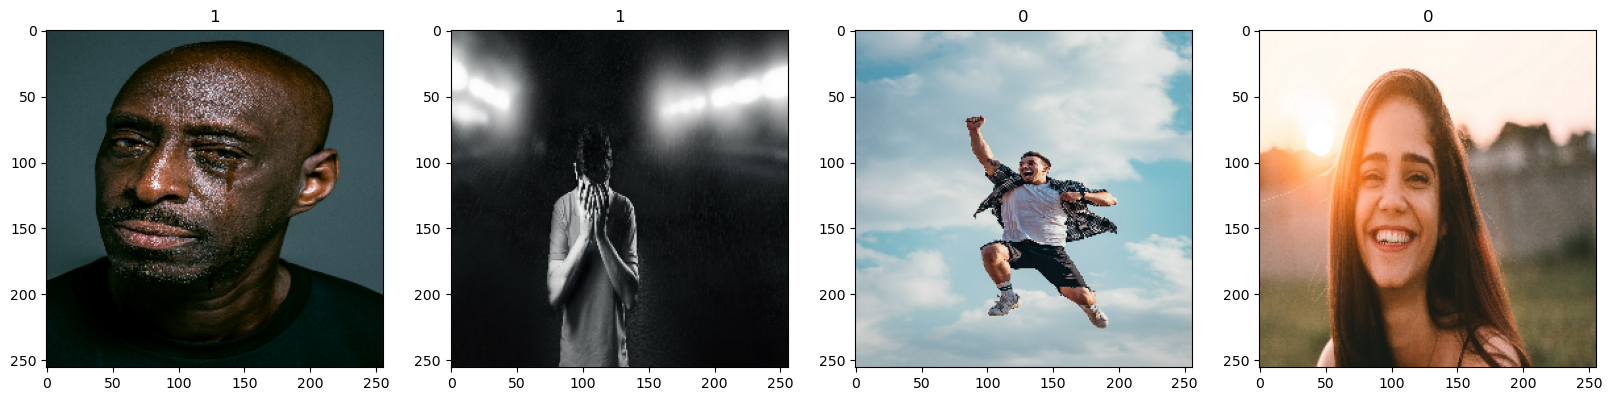

In [14]:
fig,ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### Preprocess data

In [31]:
# Scale Data
data = data.map(lambda x,y:(x/255,y))

In [32]:
scaled_iterator = data.as_numpy_iterator()

In [33]:
batch1 = scaled_iterator.next()

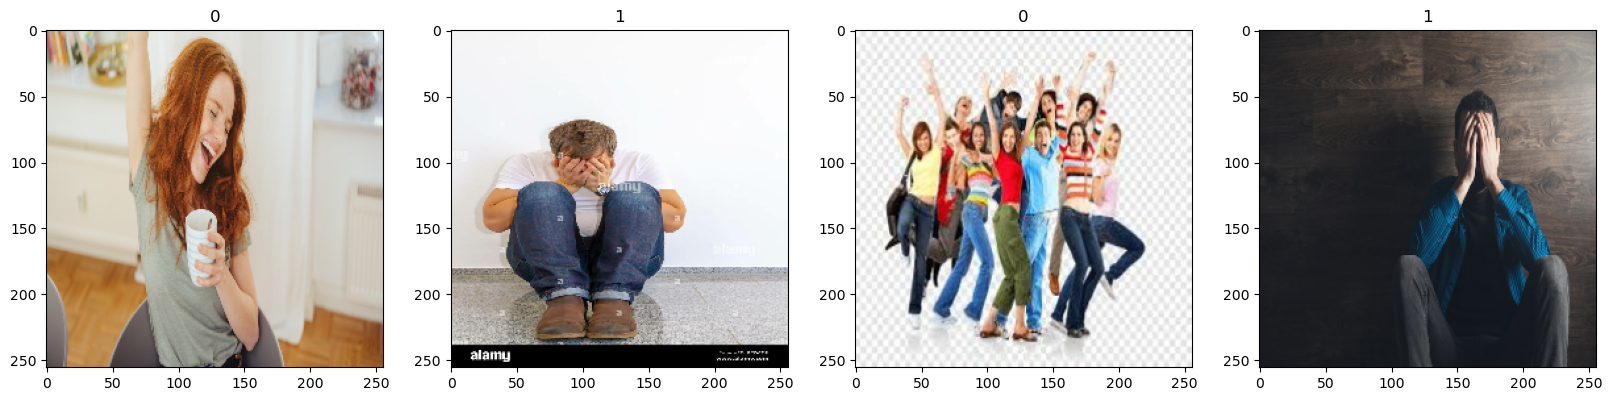

In [36]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

#### SPLIT THE DATASET

In [48]:
training = data.take(int(len(data)*.7))
validation = data.skip(int(len(data)*.7)).take(int(len(data)*.2)+1)
test = data.skip(int(len(data)*.9)).take(int(len(data)*.1)+1)

### Building the model

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [53]:
model = Sequential()
model.add(Conv2D(16,(3, 3),1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3, 3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3, 3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [55]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics = ['accuracy'])

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

### TRAIN

In [56]:
logdir = 'logs'

In [58]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [59]:
hist = model.fit(training,epochs=20,validation_data=validation,callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 6s 1s/step - loss: 1.3400 - accuracy: 0.6172 - val_loss: 1.1476 - val_accuracy: 0.2353
Epoch 2/20
4/4 [==============================] - 5s 936ms/step - loss: 0.8022 - accuracy: 0.4297 - val_loss: 0.6714 - val_accuracy: 0.7941
Epoch 3/20
4/4 [==============================] - 5s 922ms/step - loss: 0.6272 - accuracy: 0.6953 - val_loss: 0.6373 - val_accuracy: 0.5588
Epoch 4/20
4/4 [==============================] - 5s 1s/step - loss: 0.5797 - accuracy: 0.6172 - val_loss: 0.5751 - val_accuracy: 0.6471
Epoch 5/20
4/4 [==============================] - 6s 1s/step - loss: 0.5319 - accuracy: 0.7812 - val_loss: 0.4316 - val_accuracy: 0.7353
Epoch 6/20
4/4 [==============================] - 6s 1s/step - loss: 0.5087 - accuracy: 0.7188 - val_loss: 0.4594 - val_accuracy: 0.9118
Epoch 7/20
4/4 [==============================] - 6s 1s/step - loss: 0.4304 - accuracy: 0.8750 - val_loss: 0.3527 - val_accuracy: 0.8529
Epoch 8/20
4/4 [===================

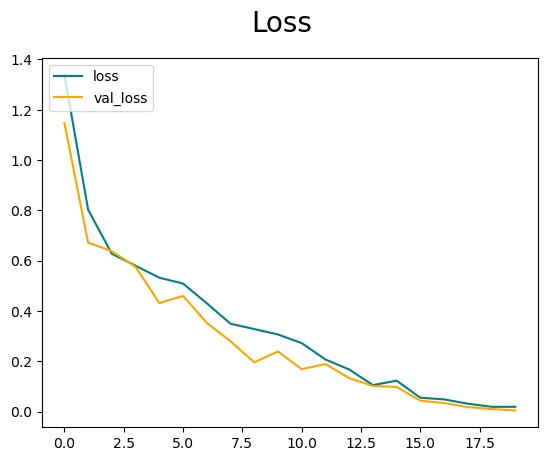

In [60]:
fig = plt.figure()
plt.plot(hist.history['loss'],color = 'teal',label='loss')
plt.plot(hist.history['val_loss'],color = 'orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()


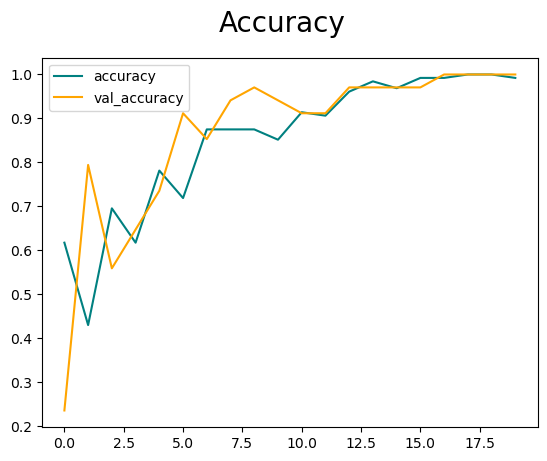

In [61]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color = 'teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color = 'orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

### EVALUATE

In [62]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [63]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [64]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 86ms/step


In [66]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision:0.0,Recall:0.0,Accuracy:1.0


In [67]:
from tensorflow.keras.models import load_model

In [68]:
model.save(os.path.join('models','happysadmodel.h5'))